![IPN](https://pbs.twimg.com/profile_images/1323639624074514432/J0RHYpAf_400x400.jpg) 



# <h1><center> Clasificación de los grados de retinopatía diabética en imágenes del fondo del ojo mediante algoritmos de aprendizaje profundo </center></h1>

# <h1><center> IPN </center></h1>

# <h1><center> Centro de Investigación en Computación </center></h1>


#<h1><center>  Jorge Diego Garcia Torres </center></h1>

In [ ]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

import os
import sys
import cv2
import shutil
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import multiprocessing as mp
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Input

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

#%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
xtrainaptos = np.load('/content/gdrive/My Drive/tesis/messidor/messi224.npy')
aptostraindf = pd.read_csv('/content/gdrive/My Drive/tesis/messidor/messidor_data.csv')

In [ ]:
aptostraindf

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable
0,20051020_43808_0100_PP.png,0.0,0.0,1
1,20051020_43832_0100_PP.png,1.0,0.0,1
2,20051020_43882_0100_PP.png,1.0,0.0,1
3,20051020_43906_0100_PP.png,2.0,1.0,1
4,20051020_44261_0100_PP.png,0.0,0.0,1
...,...,...,...,...
1743,IM004806.jpg,0.0,0.0,1
1744,IM004811.jpg,1.0,0.0,1
1745,IM004812.jpg,2.0,0.0,1
1746,IM004831.jpg,0.0,0.0,1


In [ ]:
train_complete= pd.read_csv('/content/gdrive/My Drive/tesis2/exp3messihold-out.csv')
train = pd.read_csv('/content/gdrive/My Drive/tesis2/exp3messi_5-fold.csv')

In [ ]:
train_complete

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable,set,index
0,20051021_52127_0100_PP.png,4.0,0.0,1,train,99
1,20060412_52038_0200_PP.png,2.0,0.0,1,train,767
2,20060407_45247_0200_PP.png,0.0,0.0,1,train,583
3,IM004191.jpg,0.0,0.0,1,train,1662
4,20051110_38313_0400_PP.png,0.0,0.0,1,train,134
...,...,...,...,...,...,...
1743,20060412_58965_0200_PP.png,1.0,0.0,1,test,819
1744,20060522_46149_0100_PP.png,0.0,0.0,1,test,893
1745,IM003265.jpg,0.0,0.0,1,test,1543
1746,20051212_38000_0400_PP.png,2.0,0.0,1,test,396


In [ ]:
train

,image_id,adjudicated_dr_grade,adjudicated_dme,adjudicated_gradable,set,grados,fold_0,fold_1,fold_2,fold_3,fold_4,index
0,20051021_52127_0100_PP.png,4.0,0.0,1,train,4,train,train,validation,train,train,99
1,20060412_52038_0200_PP.png,2.0,0.0,1,train,2,train,train,validation,train,train,767
2,20060407_45247_0200_PP.png,0.0,0.0,1,train,0,train,validation,train,train,train,583
3,IM004191.jpg,0.0,0.0,1,train,0,train,train,train,validation,train,1662
4,20051110_38313_0400_PP.png,0.0,0.0,1,train,0,validation,train,train,train,train,134
...,...,...,...,...,...,...,...,...,...,...,...,...
1393,IM004686.jpg,0.0,0.0,1,train,0,train,train,train,train,validation,1731
1394,20060410_40953_0200_PP.png,0.0,0.0,1,train,0,train,train,validation,train,train,630
1395,IM001805.jpg,1.0,0.0,1,train,1,train,train,validation,train,train,1347
1396,20051212_36525_0400_PP.png,2.0,0.0,1,train,2,train,validation,train,train,train,392


In [ ]:
X_train = train[train['fold_2'] == 'train']
X_val = train[train['fold_2'] == 'validation']
X_test = train_complete[train_complete['set'] == 'test']

x_train_i = X_train['index'].values
x_val_i = X_val['index'].values
x_test_i = X_test['index'].values

y_train = pd.get_dummies(aptostraindf['adjudicated_dr_grade']).values

x_train = np.load('/content/gdrive/My Drive/tesis/messidor/messi224.npy')

print(x_train_i.shape)
print(x_val_i.shape)
print(x_test_i.shape)

(1118,)
(280,)
(350,)


In [ ]:
x_train1 = np.empty((1118,224,224,3),dtype='uint8')
x_val1 = np.empty((280,224,224,3),dtype='uint8')

y_train1 =  np.empty((1118,5),dtype='uint8')
y_val1 = np.empty((280,5),dtype='uint8')

for i in range(len(x_train_i)):
  x_train1[i] = x_train[x_train_i[i]]
  y_train1[i] = y_train[x_train_i[i]]

for j in range(len(x_val_i)):
  x_val1[j] = x_train[x_val_i[j]]
  y_val1[j] = y_train[x_val_i[j]]

x_test1= np.empty((350,224,224,3),dtype='uint8')
y_test1= np.empty((350,5),dtype='uint8')

for i in range(len(x_test_i)):
  x_test1[i]= x_train[x_test_i[i]]
  y_test1[i]= y_train[x_test_i[i]]

In [ ]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(1118, 224, 224, 3)
(280, 224, 224, 3)
(1118, 5)
(280, 5)


In [ ]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [ ]:
weights_path_list = ['/content/gdrive/My Drive/tesis2/exp3messifinalefffold0.h5', '/content/gdrive/My Drive/tesis2/exp3messifinalefffold1.h5',
                     '/content/gdrive/My Drive/tesis2/exp3messifinalefffold2.h5', '/content/gdrive/My Drive/tesis2/exp3messifinalefffold3.h5',
                     '/content/gdrive/My Drive/tesis2/exp3messifinalefffold4.h5']

In [ ]:
def ensemble_preds(model_list, generator):
    preds_ensemble = []
    for model in model_list:
        generator.reset()
        preds = model.predict(generator, verbose = 1)
        preds_ensemble.append(preds)
        generator.reset()

    return np.mean(preds_ensemble, axis=0)


def apply_tta(model, generator, steps=5):
    step_size = generator.n//generator.batch_size
    preds_tta = []
    for i in range(steps):
        generator.reset()
        preds = model.predict_generator(generator, steps=step_size)
        preds_tta.append(preds)

    return np.mean(preds_tta, axis=0)

def test_ensemble_preds(model_list, generator, steps=5):
    preds_ensemble = []
    for model in model_list:
        preds = apply_tta(model, generator, steps)
        preds_ensemble.append(preds)

    return np.mean(preds_ensemble, axis=0)


In [ ]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [ ]:
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=1, seed=2020)
vdata_gen =  val_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)
tdata_gen =  test_datagen.flow(x_test1, y_test1, batch_size=1, seed=2020)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [ ]:
pip install -U efficientnet

     |████████████████████████████████| 51kB 4.7MB/s 


In [ ]:
import efficientnet.keras as efn 

In [ ]:
def create_model(input_shape, n_out, weights_path):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights=None,include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)

    model.load_weights(weights_path)
    return model

In [ ]:
model_list = []

for weights_path in weights_path_list:
  model_list.append(create_model(input_shape=(224, 224, 3), n_out=5, weights_path= weights_path))

In [ ]:
vdata_gen.reset()

x_vdata = np.zeros((280,224, 224, 3))
y_val2 = np.array([[0,0,0,0,0]])

for i in range(280):
  y_val2 =np.append(y_val2, vdata_gen[i][1], axis=0)
  x_vdata[i]= vdata_gen[i][0]

y_val2 = np.delete(y_val2,0, axis=0)

vdata_gen.reset()

In [ ]:
val_gen1 = [np.argmax(pred) for pred in y_val2]
val_gen1

In [ ]:
preds_ensemble = []

In [ ]:
val_preds_model1 = model_list[0].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model1)
val_preds_model1 = [np.argmax(pred) for pred in val_preds_model1]


9/9 [==============================] - 1s 81ms/step


In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model1, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.761


In [ ]:
val_preds_model2 = model_list[1].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model2)
val_preds_model2 = [np.argmax(pred) for pred in val_preds_model2]

9/9 [==============================] - 1s 66ms/step


In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model2, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.876


In [ ]:
val_preds_model3 = model_list[2].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model3)
val_preds_model3 = [np.argmax(pred) for pred in val_preds_model3]

9/9 [==============================] - 1s 64ms/step


In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model3, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.813


In [ ]:
val_preds_model4 = model_list[3].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model4)
val_preds_model4 = [np.argmax(pred) for pred in val_preds_model4]

9/9 [==============================] - 1s 64ms/step


In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model4, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.881


In [ ]:
val_preds_model5 = model_list[4].predict(x_vdata, verbose = 1)
preds_ensemble.append(val_preds_model5)
val_preds_model5 = [np.argmax(pred) for pred in val_preds_model5]

9/9 [==============================] - 1s 66ms/step


In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds_model5, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.881


In [ ]:
preds_ensemble =  np.mean(preds_ensemble, axis=0)
preds_ensemble = [np.argmax(pred) for pred in preds_ensemble]

In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(preds_ensemble, val_gen1, weights='quadratic'))

Val Cohen Kappa score: 0.875


In [ ]:
def plot_conf_matrix(true,pred,classes):
    cf = confusion_matrix(true, pred)
    
    df_cm = pd.DataFrame(cf, range(len(classes)), range(len(classes)))
    plt.figure(figsize=(8,5.5))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},xticklabels = classes ,yticklabels = classes,fmt='g')
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
    plt.show()

In [ ]:
import seaborn as sns

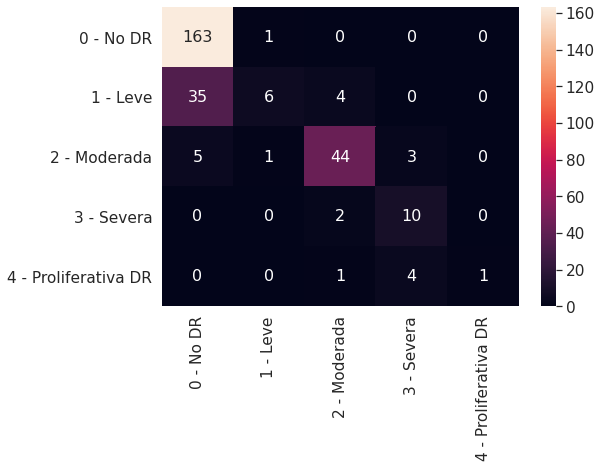

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(val_gen1,preds_ensemble,labels)

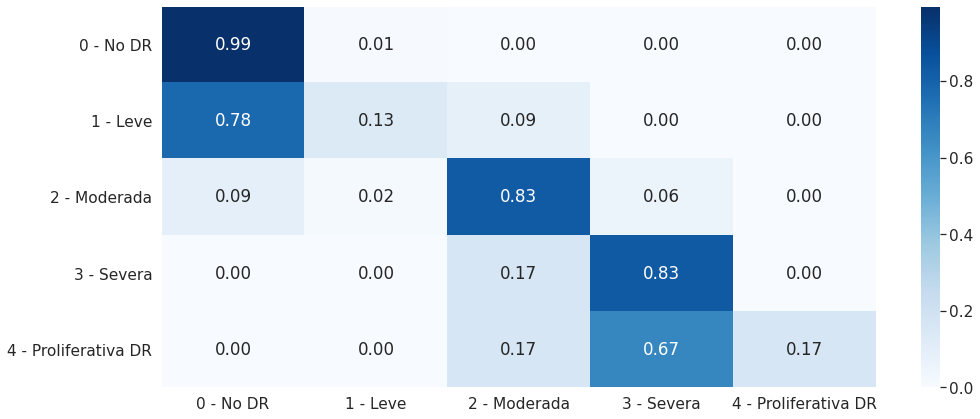

In [ ]:
cnf_matrix = confusion_matrix(val_gen1, preds_ensemble)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

In [ ]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_gen1, preds_ensemble, weights='quadratic'))
print("Val Accuracy score : %.3f" % accuracy_score(val_gen1, preds_ensemble))

print('F1 score: %.3f' % f1_score(val_gen1, preds_ensemble,average='micro'))
print('F1 score: %.3f' % f1_score(val_gen1, preds_ensemble,average='weighted'))
print('F1 score: %.3f' % f1_score(val_gen1, preds_ensemble,average='macro'))


print('Recall: %.3f' % recall_score(val_gen1, preds_ensemble,average='micro'))
print('Recall: %.3f' % recall_score(val_gen1, preds_ensemble,average='weighted'))
print('Recall: %.3f' % recall_score(val_gen1, preds_ensemble,average='macro'))

print('Precision: %.3f' % precision_score(val_gen1, preds_ensemble,average='micro'))
print('Precision: %.3f' % precision_score(val_gen1, preds_ensemble,average='weighted'))
print('Precision: %.3f' % precision_score(val_gen1, preds_ensemble,average='macro'))

print('\n clasification report:\n  ' + classification_report(val_gen1, preds_ensemble)) 

Val Cohen Kappa score: 0.875
Val Accuracy score : 0.800
F1 score: 0.800
F1 score: 0.753
F1 score: 0.587
Recall: 0.800
Recall: 0.800
Recall: 0.591
Precision: 0.800
Precision: 0.801
Precision: 0.801

 clasification report:
                precision    recall  f1-score   support

           0       0.80      0.99      0.89       164
           1       0.75      0.13      0.23        45
           2       0.86      0.83      0.85        53
           3       0.59      0.83      0.69        12
           4       1.00      0.17      0.29         6

    accuracy                           0.80       280
   macro avg       0.80      0.59      0.59       280
weighted avg       0.80      0.80      0.75       280



test data sin TTA

In [ ]:
tdata_gen.reset()

x_tdata = np.zeros((350,224, 224, 3))
y_test2 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test2 =np.append(y_test2, tdata_gen[i][1], axis=0)
  x_tdata[i]= tdata_gen[i][0]

y_test2 = np.delete(y_test2,0, axis=0)

tdata_gen.reset()

In [ ]:
tpreds_ensemble = []

In [ ]:
test_preds_model1 = model_list[4].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model1)
test_preds_model1 = [np.argmax(pred) for pred in test_preds_model1]

11/11 [==============================] - 1s 66ms/step


In [ ]:
test_gen1 = [np.argmax(pred) for pred in y_test2]

In [ ]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model1, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.817


In [ ]:
test_preds_model2 = model_list[1].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model2)
test_preds_model2 = [np.argmax(pred) for pred in test_preds_model2]

11/11 [==============================] - 1s 67ms/step


In [ ]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model2, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.801


In [ ]:
test_preds_model3 = model_list[2].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model3)
test_preds_model3 = [np.argmax(pred) for pred in test_preds_model3]

11/11 [==============================] - 1s 67ms/step


In [ ]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model3, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.812


In [ ]:
test_preds_model4 = model_list[3].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model4)
test_preds_model4 = [np.argmax(pred) for pred in test_preds_model4]

11/11 [==============================] - 1s 66ms/step


In [ ]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model4, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.803


In [ ]:
test_preds_model5 = model_list[4].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model5)
test_preds_model5 = [np.argmax(pred) for pred in test_preds_model5]

11/11 [==============================] - 1s 66ms/step


In [ ]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model5, test_gen1, weights='quadratic'))

test Cohen Kappa score: 0.817


In [ ]:
tpreds_ensemble =  np.mean(tpreds_ensemble, axis=0)
tpreds_ensemble = [np.argmax(pred) for pred in tpreds_ensemble]

In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(tpreds_ensemble, test_gen1, weights='quadratic'))

Test Cohen Kappa score: 0.820


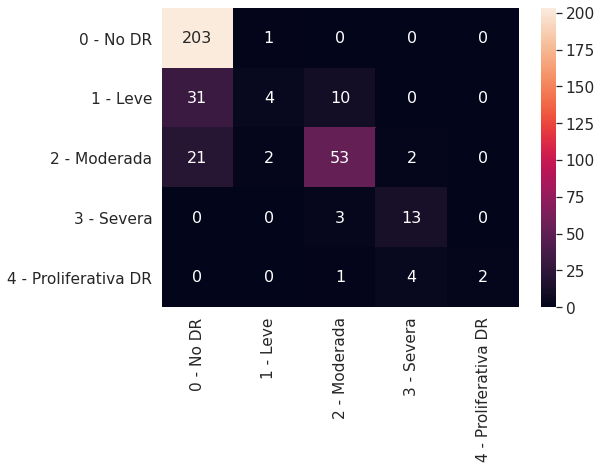

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(test_gen1,tpreds_ensemble,labels)

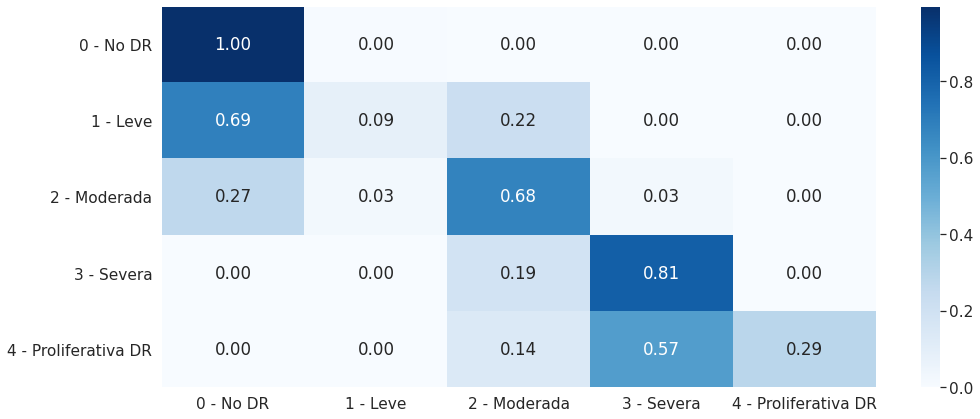

In [ ]:
cnf_matrix = confusion_matrix(test_gen1, tpreds_ensemble)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [ ]:
cf = cnf_matrix

In [ ]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[52  3 14  6  0]
FN
[ 1 41 25  3  5]
TP
[203   4  53  13   2]
TN
[ 94 302 258 328 343]
Sensitivity
[0.99509804 0.08888889 0.67948718 0.8125     0.28571429]
Specificity
[0.64383562 0.99016393 0.94852941 0.98203593 1.        ]
Precision
[0.79607843 0.57142857 0.79104478 0.68421053 1.        ]
[0.98947368 0.88046647 0.91166078 0.99093656 0.98563218]
[0.35616438 0.00983607 0.05147059 0.01796407 0.        ]
[0.00490196 0.91111111 0.32051282 0.1875     0.71428571]
[0.20392157 0.42857143 0.20895522 0.31578947 0.        ]
Acc
[0.84857143 0.87428571 0.88857143 0.97428571 0.98571429]
Sensitivity mean
0.572337678661208
Specificity mean
0.9129129781546009
Precision mean
0.7685524610472625


In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(test_gen1, tpreds_ensemble, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(test_gen1, tpreds_ensemble))

print('F1 score: %.3f' % f1_score(test_gen1, tpreds_ensemble,average='micro'))
print('F1 score: %.3f' % f1_score(test_gen1, tpreds_ensemble,average='weighted'))
print('F1 score: %.3f' % f1_score(test_gen1, tpreds_ensemble,average='macro'))

print('Recall: %.3f' % recall_score(test_gen1, tpreds_ensemble,average='micro'))
print('Recall: %.3f' % recall_score(test_gen1, tpreds_ensemble,average='weighted'))
print('Recall: %.3f' % recall_score(test_gen1, tpreds_ensemble,average='macro'))

print('Precision: %.3f' % precision_score(test_gen1, tpreds_ensemble,average='micro'))
print('Precision: %.3f' % precision_score(test_gen1, tpreds_ensemble,average='weighted'))
print('Precision: %.3f' % precision_score(test_gen1, tpreds_ensemble,average='macro'))

print('\n clasification report:\n  ' + classification_report(test_gen1, tpreds_ensemble)) 

Test Cohen Kappa score: 0.816
Test Accuracy score : 0.786
F1 score: 0.786
F1 score: 0.741
F1 score: 0.591
Recall: 0.786
Recall: 0.786
Recall: 0.572
Precision: 0.786
Precision: 0.765
Precision: 0.769

 clasification report:
                precision    recall  f1-score   support

           0       0.80      1.00      0.88       204
           1       0.57      0.09      0.15        45
           2       0.79      0.68      0.73        78
           3       0.68      0.81      0.74        16
           4       1.00      0.29      0.44         7

    accuracy                           0.79       350
   macro avg       0.77      0.57      0.59       350
weighted avg       0.77      0.79      0.74       350



In [ ]:
from scipy import stats

In [ ]:
#stats.trim_mean()

trim mean


In [ ]:
tdata_gen.reset()

x_tdata = np.zeros((350,224, 224, 3))
y_test2 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test2 =np.append(y_test2, tdata_gen[i][1], axis=0)
  x_tdata[i]= tdata_gen[i][0]

y_test2 = np.delete(y_test2,0, axis=0)

tdata_gen.reset()

In [ ]:
test_gen1 = [np.argmax(pred) for pred in y_test2]

In [ ]:
tpreds_ensemble = []

In [ ]:
test_preds_model1 = model_list[0].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model1)
test_preds_model1 = [np.argmax(pred) for pred in test_preds_model1]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model1, test_gen1, weights='quadratic'))

11/11 [==============================] - 1s 67ms/step
test Cohen Kappa score: 0.672


In [ ]:
test_preds_model2 = model_list[1].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model2)
test_preds_model2 = [np.argmax(pred) for pred in test_preds_model2]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model2, test_gen1, weights='quadratic'))

11/11 [==============================] - 1s 68ms/step
test Cohen Kappa score: 0.786


In [ ]:
test_preds_model3 = model_list[2].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model3)
test_preds_model3 = [np.argmax(pred) for pred in test_preds_model3]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model3, test_gen1, weights='quadratic'))

11/11 [==============================] - 1s 66ms/step
test Cohen Kappa score: 0.810


In [ ]:
test_preds_model4 = model_list[3].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model4)
test_preds_model4 = [np.argmax(pred) for pred in test_preds_model4]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model4, test_gen1, weights='quadratic'))

11/11 [==============================] - 1s 66ms/step
test Cohen Kappa score: 0.805


In [ ]:
test_preds_model5 = model_list[4].predict(x_tdata, verbose = 1)
tpreds_ensemble.append(test_preds_model5)
test_preds_model5 = [np.argmax(pred) for pred in test_preds_model5]
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(test_preds_model5, test_gen1, weights='quadratic'))

11/11 [==============================] - 1s 67ms/step
test Cohen Kappa score: 0.813


In [ ]:
t1preds_ensemble =  stats.trim_mean(tpreds_ensemble,.25, axis=0)
t1preds_ensemble = [np.argmax(pred) for pred in t1preds_ensemble]

In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(t1preds_ensemble, test_gen1, weights='quadratic'))

Test Cohen Kappa score: 0.812


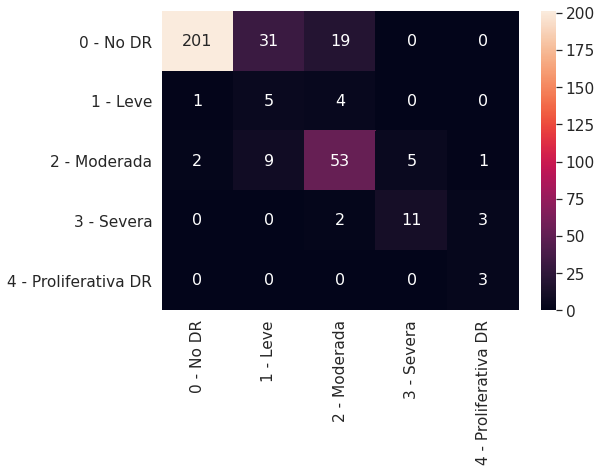

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(t1preds_ensemble,test_gen1,labels)

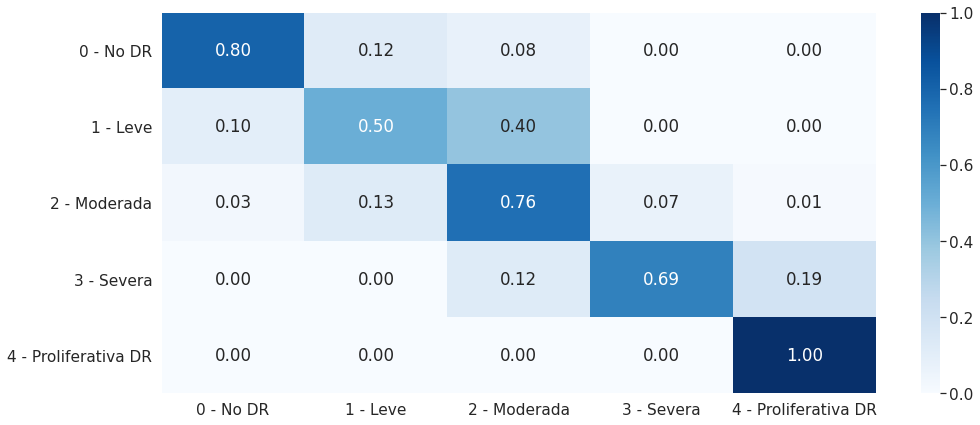

In [ ]:
cnf_matrix = confusion_matrix(t1preds_ensemble, test_gen1)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

In [ ]:
cf = cnf_matrix

In [ ]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[ 3 40 25  5  4]
FN
[50  5 17  5  0]
TP
[201   5  53  11   3]
TN
[ 96 300 255 329 343]
Sensitivity
[0.80079681 0.5        0.75714286 0.6875     1.        ]
Specificity
[0.96969697 0.88235294 0.91071429 0.98502994 0.98847262]
Precision
[0.98529412 0.11111111 0.67948718 0.6875     0.42857143]
[0.65753425 0.98360656 0.9375     0.98502994 1.        ]
[0.03030303 0.11764706 0.08928571 0.01497006 0.01152738]
[0.19920319 0.5        0.24285714 0.3125     0.        ]
[0.01470588 0.88888889 0.32051282 0.3125     0.57142857]
Acc
[0.84857143 0.87142857 0.88       0.97142857 0.98857143]
Sensitivity mean
0.7490879339783723
Specificity mean
0.9472533518371746
Precision mean
0.5783927673633555


In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(test_gen1, t1preds_ensemble, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(test_gen1, t1preds_ensemble))

print('F1 score: %.3f' % f1_score(test_gen1, t1preds_ensemble,average='micro'))
print('F1 score: %.3f' % f1_score(test_gen1, t1preds_ensemble,average='weighted'))
print('F1 score: %.3f' % f1_score(test_gen1, t1preds_ensemble,average='macro'))

print('Recall: %.3f' % recall_score(test_gen1, t1preds_ensemble,average='micro'))
print('Recall: %.3f' % recall_score(test_gen1, t1preds_ensemble,average='weighted'))
print('Recall: %.3f' % recall_score(test_gen1, t1preds_ensemble,average='macro'))

print('Precision: %.3f' % precision_score(test_gen1, t1preds_ensemble,average='micro'))
print('Precision: %.3f' % precision_score(test_gen1, t1preds_ensemble,average='weighted'))
print('Precision: %.3f' % precision_score(test_gen1, t1preds_ensemble,average='macro'))

print('\n clasification report:\n  ' + classification_report(test_gen1, t1preds_ensemble))

Test Cohen Kappa score: 0.812
Test Accuracy score : 0.780
F1 score: 0.780
F1 score: 0.741
F1 score: 0.614
Recall: 0.780
Recall: 0.780
Recall: 0.578
Precision: 0.780
Precision: 0.751
Precision: 0.749

 clasification report:
                precision    recall  f1-score   support

           0       0.80      0.99      0.88       204
           1       0.50      0.11      0.18        45
           2       0.76      0.68      0.72        78
           3       0.69      0.69      0.69        16
           4       1.00      0.43      0.60         7

    accuracy                           0.78       350
   macro avg       0.75      0.58      0.61       350
weighted avg       0.75      0.78      0.74       350



TTA

In [ ]:
def apply_tta(model, generator, steps=5):
    step_size = generator.n//generator.batch_size
    preds_tta = []
    for i in range(steps):
        generator.reset()
        preds = model.predict_generator(generator, steps=step_size, verbose= 1)
        preds_tta.append(preds)

    return np.mean(preds_tta, axis=0)

In [ ]:
def test_ensemble_preds(model_list, generator, steps=5):
    preds_ensemble = []
    for model in model_list:
        preds = apply_tta(model, generator, steps)
        preds_ensemble.append(preds)

    return np.mean(preds_ensemble, axis=0)

In [ ]:
TTA_STEPS = 10

In [ ]:
tdata_gen.reset()

x_tdata = np.zeros((350,224, 224, 3))
y_test2 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test2 =np.append(y_test2, tdata_gen[i][1], axis=0)
  x_tdata[i]= tdata_gen[i][0]

y_test2 = np.delete(y_test2,0, axis=0)

tdata_gen.reset()

In [ ]:
tdata_gen.reset()

x_tdata1 = np.zeros((350,224, 224, 3))
y_test12 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test12 =np.append(y_test12, tdata_gen[i][1], axis=0)
  x_tdata1[i]= tdata_gen[i][0]

y_test12 = np.delete(y_test12,0, axis=0)

tdata_gen.reset()

In [ ]:
tdata_gen.reset()

x_tdata2 = np.zeros((350,224, 224, 3))
y_test22 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test22 =np.append(y_test22, tdata_gen[i][1], axis=0)
  x_tdata2[i]= tdata_gen[i][0]

y_test22 = np.delete(y_test22,0, axis=0)

tdata_gen.reset()

In [ ]:
tdata_gen.reset()

x_tdata3 = np.zeros((350,224, 224, 3))
y_test32 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test32 =np.append(y_test32, tdata_gen[i][1], axis=0)
  x_tdata3[i]= tdata_gen[i][0]

y_test32 = np.delete(y_test32,0, axis=0)

tdata_gen.reset()

In [ ]:
tdata_gen.reset()

x_tdata4 = np.zeros((350,224, 224, 3))
y_test42 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test42 =np.append(y_test42, tdata_gen[i][1], axis=0)
  x_tdata4[i]= tdata_gen[i][0]

y_test42 = np.delete(y_test42,0, axis=0)

tdata_gen.reset()

In [ ]:
tdata_gen.reset()

x_tdata5 = np.zeros((350,224, 224, 3))
y_test52 = np.array([[0,0,0,0,0]])

for i in range(350):
  y_test52 =np.append(y_test52, tdata_gen[i][1], axis=0)
  x_tdata5[i]= tdata_gen[i][0]

y_test52 = np.delete(y_test52,0, axis=0)

tdata_gen.reset()

In [ ]:
preds_ensemble = []

In [ ]:
preds_tta = []

In [ ]:
test_preds_model1 = model_list[0].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model1)

test_preds_model1 = model_list[0].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model1)

test_model1 = np.mean(preds_tta, axis=0)

11/11 [==============================] - 1s 66ms/step


In [ ]:
preds_ensemble.append(test_model1)

In [ ]:
preds_tta = []

In [ ]:
test_preds_model2 = model_list[1].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model2)

test_preds_model2 = model_list[1].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model2)

test_model2 = np.mean(preds_tta, axis=0)

11/11 [==============================] - 1s 66ms/step


In [ ]:
preds_ensemble.append(test_model2)

In [ ]:
preds_tta = []

In [ ]:
test_preds_model3 = model_list[2].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[2].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model3)

test_model3 = np.mean(preds_tta, axis=0)

11/11 [==============================] - 1s 66ms/step


In [ ]:
preds_ensemble.append(test_model3)

In [ ]:
preds_tta = []

In [ ]:
test_preds_model3 = model_list[3].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[3].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model3)

test_model4 = np.mean(preds_tta, axis=0)

11/11 [==============================] - 1s 66ms/step


In [ ]:
preds_ensemble.append(test_model4)

In [ ]:
preds_tta = []

In [ ]:
test_preds_model3 = model_list[4].predict(x_tdata, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata1, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata2, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata3, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata4, verbose = 1)
preds_tta.append(test_preds_model3)

test_preds_model3 = model_list[4].predict(x_tdata5, verbose = 1)
preds_tta.append(test_preds_model3)

test_model5 = np.mean(preds_tta, axis=0)

11/11 [==============================] - 1s 66ms/step


In [ ]:
preds_ensemble.append(test_model5)

In [ ]:
preds_tta = []

In [ ]:
ttapreds= np.mean(preds_ensemble, axis=0)

In [ ]:
ttapreds1 = [np.argmax(pred) for pred in ttapreds]

In [ ]:
c=y_test2 == y_test32
c.all()

True

In [ ]:
y_test2tta = [np.argmax(pred) for pred in y_test2]

In [ ]:
print("test Cohen Kappa score: %.3f" % cohen_kappa_score(ttapreds1, y_test2tta, weights='quadratic'))

test Cohen Kappa score: 0.817


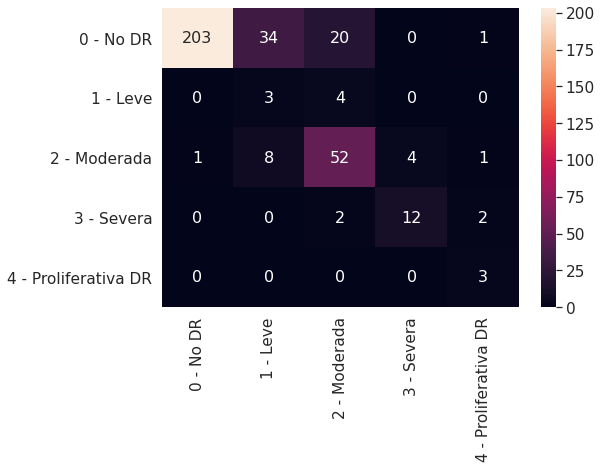

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(ttapreds1,y_test2tta, labels)

In [ ]:
cf = confusion_matrix(y_test2tta, ttapreds1)

In [ ]:
FP = cf.sum(axis=0) - np.diag(cf)  
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP')
print(FP)
print('FN')
print(FN)
print('TP')
print(TP)
print('TN')
print(TN)
print('Sensitivity')
print(TPR)
print('Specificity')
print(TNR)
print('Precision')
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)
print('Acc')
print(ACC)

print('Sensitivity mean')
print(np.mean(TPR))
print('Specificity mean')
print(np.mean(TNR))
print('Precision mean')
print(np.mean(PPV))


FP
[53  3 15  6  0]
FN
[ 1 43 24  4  5]
TP
[203   2  54  12   2]
TN
[ 93 302 257 328 343]
Sensitivity
[0.99509804 0.04444444 0.69230769 0.75       0.28571429]
Specificity
[0.6369863  0.99016393 0.94485294 0.98203593 1.        ]
Precision
[0.79296875 0.4        0.7826087  0.66666667 1.        ]
[0.9893617  0.87536232 0.91459075 0.98795181 0.98563218]
[0.3630137  0.00983607 0.05514706 0.01796407 0.        ]
[0.00490196 0.95555556 0.30769231 0.25       0.71428571]
[0.20703125 0.6        0.2173913  0.33333333 0.        ]
Acc
[0.84571429 0.86857143 0.88857143 0.97142857 0.98571429]
Sensitivity mean
0.5535128923364218
Specificity mean
0.9108078210232552
Precision mean
0.7284488224637681


In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(ttapreds1, y_test2tta, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(ttapreds1, y_test2tta))

print('F1 score: %.3f' % f1_score(ttapreds1, y_test2tta,average='micro'))
print('F1 score: %.3f' % f1_score(ttapreds1, y_test2tta,average='weighted'))
print('F1 score: %.3f' % f1_score(y_test2tta,ttapreds1,average='macro'))

print('Recall: %.3f' % recall_score(ttapreds1, y_test2tta,average='micro'))
print('Recall: %.3f' % recall_score(ttapreds1, y_test2tta,average='weighted'))
print('Recall: %.3f' % recall_score(y_test2tta,ttapreds1,average='macro'))

print('Precision: %.3f' % precision_score(ttapreds1, y_test2tta,average='micro'))
print('Precision: %.3f' % precision_score(ttapreds1, y_test2tta,average='weighted'))
print('Precision: %.3f' % precision_score(y_test2tta,ttapreds1,average='macro'))

print('\n clasification report:\n  ' + classification_report(ttapreds1, y_test2tta))

Test Cohen Kappa score: 0.817
Test Accuracy score : 0.780
F1 score: 0.780
F1 score: 0.830
F1 score: 0.570
Recall: 0.780
Recall: 0.780
Recall: 0.554
Precision: 0.780
Precision: 0.905
Precision: 0.728

 clasification report:
                precision    recall  f1-score   support

           0       1.00      0.79      0.88       256
           1       0.04      0.40      0.08         5
           2       0.69      0.78      0.73        69
           3       0.75      0.67      0.71        18
           4       0.29      1.00      0.44         2

    accuracy                           0.78       350
   macro avg       0.55      0.73      0.57       350
weighted avg       0.91      0.78      0.83       350



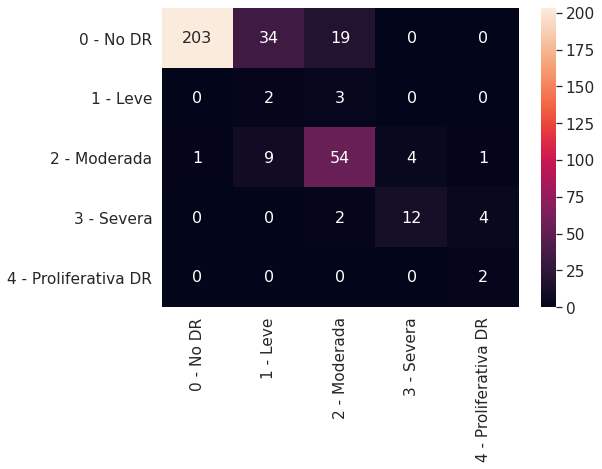

In [ ]:
labels = ['0 - No DR', '1 - Leve', '2 - Moderada', '3 - Severa', '4 - Proliferativa DR']
plot_conf_matrix(ttapreds1, y_test2tta,labels)

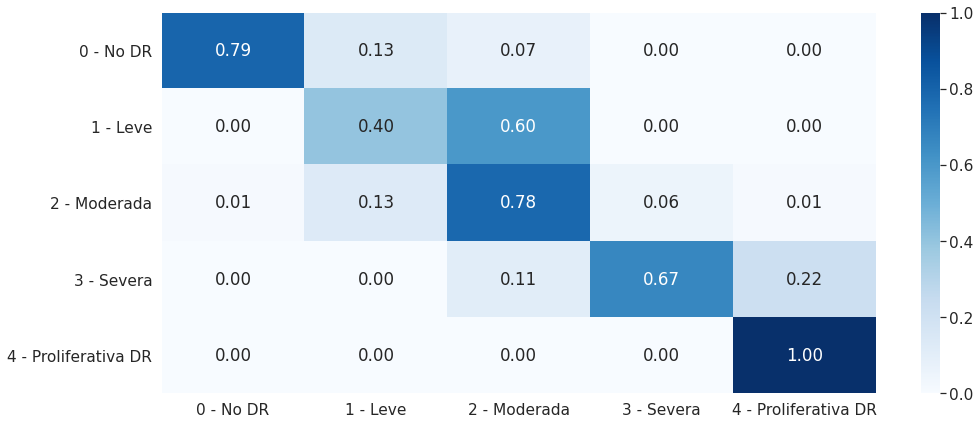

In [ ]:
cnf_matrix = confusion_matrix(ttapreds1, y_test2tta)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

# TTA y trimedian

In [ ]:
preds_ensemble = []


for i in range(len(model_list)):
  preds_tta = []

  test_preds_model = model_list[i].predict(x_tdata, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata1, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata2, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata3, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata4, verbose = 1)
  preds_tta.append(test_preds_model)

  test_preds_model = model_list[i].predict(x_tdata5, verbose = 1)
  preds_tta.append(test_preds_model)

  test_model = stats.trim_mean(preds_tta,0.25, axis=0)
  preds_ensemble.append(test_model)

preds1_ensemble = stats.trim_mean(preds_ensemble,0.25, axis=0)


11/11 [==============================] - 1s 66ms/step


In [ ]:
preds1_ensemble1 = [np.argmax(pred) for pred in preds1_ensemble]

In [ ]:
print("Test Cohen Kappa score: %.3f" % cohen_kappa_score(preds1_ensemble1, y_test2tta, weights='quadratic'))
print("Test Accuracy score : %.3f" % accuracy_score(preds1_ensemble1, y_test2tta))

print('F1 score: %.3f' % f1_score(preds1_ensemble1, y_test2tta,average='micro'))
print('F1 score: %.3f' % f1_score(preds1_ensemble1, y_test2tta,average='weighted'))
print('F1 score: %.3f' % f1_score( y_test2tta,preds1_ensemble1,average='macro'))

print('Recall: %.3f' % recall_score(preds1_ensemble1, y_test2tta,average='micro'))
print('Recall: %.3f' % recall_score(y_test2tta,preds1_ensemble1,average='weighted'))
print('Recall: %.3f' % recall_score(y_test2tta,preds1_ensemble1,average='macro'))


print('Precision: %.3f' % precision_score(preds1_ensemble1, y_test2tta,average='micro'))
print('Precision: %.3f' % precision_score(preds1_ensemble1, y_test2tta,average='weighted'))
print('Precision: %.3f' % precision_score(y_test2tta, preds1_ensemble1, average='macro'))

print('\n clasification report:\n  ' + classification_report(preds1_ensemble1, y_test2tta))

Test Cohen Kappa score: 0.817
Test Accuracy score : 0.780
F1 score: 0.780
F1 score: 0.830
F1 score: 0.570
Recall: 0.780
Recall: 0.780
Recall: 0.554
Precision: 0.780
Precision: 0.905
Precision: 0.728

 clasification report:
                precision    recall  f1-score   support

           0       1.00      0.79      0.88       256
           1       0.04      0.40      0.08         5
           2       0.69      0.78      0.73        69
           3       0.75      0.67      0.71        18
           4       0.29      1.00      0.44         2

    accuracy                           0.78       350
   macro avg       0.55      0.73      0.57       350
weighted avg       0.91      0.78      0.83       350

